# INSY695 Group Project

## Step 2: Data Exploration

After aggregating all the datasets, we then start exploring the data.

## 2.1 <b>Import Dataset</b>

In [1]:
import pandas as pd
data = pd.read_csv("/Users/kex/Desktop/Winter 2022/INSY 695 Advanced Topics in Information System/Group Project/combined_data.csv")

## 2.2 <b>Check How Data Look Like</b>

In [30]:
data.shape # 52610 rows, 29 columns

(52610, 29)

In [2]:
data.head()

,Unnamed: 0,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,...,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,...,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes
1,1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,...,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No
2,2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,...,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No
3,3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,...,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No
4,4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,...,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No


## 2.3 Check Missing Values

In [67]:
data.isnull().sum()

game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
type                          0
date_time_GMT                 0
home_rink_side_start       2392
venue                         0
venue_time_zone_id            0
venue_time_zone_offset        0
venue_time_zone_tz            0
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalie_replacement           35
year                          0
month                         0
dtype: i

## 2.4 <b>Remove Irrelevant Column</b>

In [3]:
data = data.drop(columns='Unnamed: 0')

In [4]:
data.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,...,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalie_replacement
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,...,right,United Center,America/Chicago,-5,CDT,990.833333,841.388889,55.555556,93.888889,Yes
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,...,right,United Center,America/Chicago,-5,CDT,981.333333,836.777778,75.111111,69.444444,No
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,...,left,KeyBank Center,America/New_York,-4,EDT,1002.222222,879.611111,28.444444,94.166667,No
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,...,left,KeyBank Center,America/New_York,-4,EDT,999.222222,888.333333,75.333333,35.555556,No
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,...,right,MTS Centre,America/Winnipeg,-5,CDT,986.666667,844.722222,53.333333,88.611111,No


## 2.5 <b>Check Variable Types</b>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

# 2.6 <b>Examine Data Distribution of Each Variable<b/>

In this section, we use histograms to look at the distribution of numeric variables. For categorical variables, we count the frequency of each value.

In [6]:
data["HoA"].value_counts()

away    26305
home    26305
Name: HoA, dtype: int64

In [7]:
data["won"].value_counts()

False    26947
True     25663
Name: won, dtype: int64

In [10]:
data["settled_in"].value_counts()

REG    40306
OT     12256
tbc       48
Name: settled_in, dtype: int64

In [9]:
data["head_coach"].value_counts()

Barry Trotz         1804
Joel Quenneville    1599
John Tortorella     1563
Claude Julien       1500
Mike Babcock        1475
                    ... 
Al Arbour              1
Dan Lacroix            1
Cap Raeder             1
Terry O'Reilly         1
Martin Raymond         1
Name: head_coach, Length: 146, dtype: int64

<AxesSubplot:>

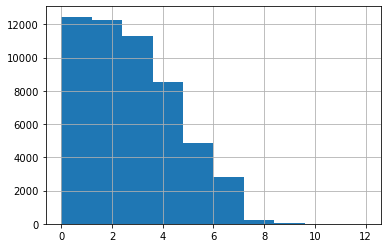

In [13]:
data["goals"].hist()

<AxesSubplot:>

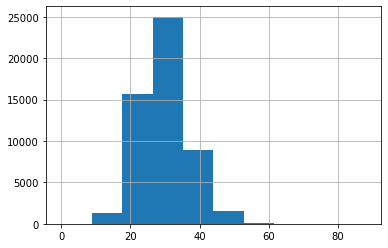

In [14]:
data["shots"].hist()

<AxesSubplot:>

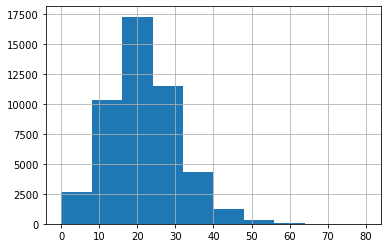

In [15]:
data["hits"].hist()

<AxesSubplot:>

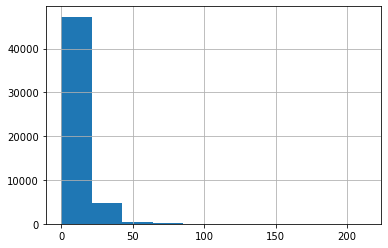

In [16]:
data["pim"].hist()

<AxesSubplot:>

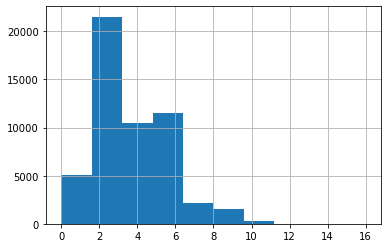

In [17]:
data["powerPlayOpportunities"].hist()

<AxesSubplot:>

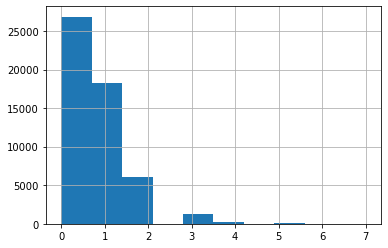

In [18]:
data["powerPlayGoals"].hist()

<AxesSubplot:>

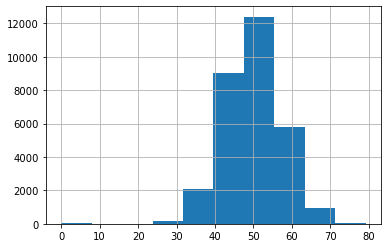

In [19]:
data["faceOffWinPercentage"].hist()

<AxesSubplot:>

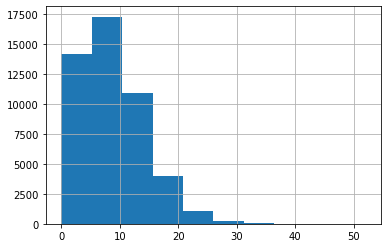

In [20]:
data["giveaways"].hist()

<AxesSubplot:>

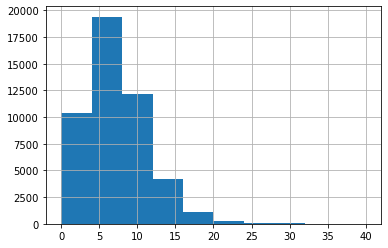

In [21]:
data["takeaways"].hist()

<AxesSubplot:>

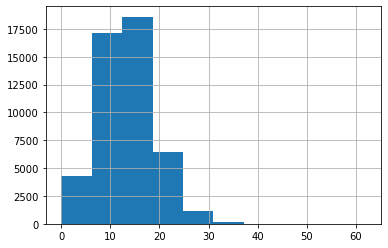

In [22]:
data["blocked"].hist()

<AxesSubplot:>

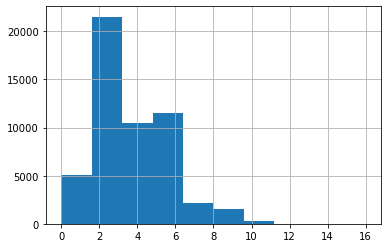

In [23]:
data["powerPlayOpportunities"].hist()

In [24]:
data["startRinkSide"].value_counts()

left     26852
right    23366
Name: startRinkSide, dtype: int64

In [25]:
data["type"].value_counts()

R    50342
P     2248
A       20
Name: type, dtype: int64

In [29]:
# Check the format of variable "date_time_GMT"
data["date_time_GMT"].value_counts()

2019-11-28T00:00:00Z    32
2018-12-02T00:00:00Z    28
2020-02-05T00:00:00Z    28
2019-11-24T00:00:00Z    28
2020-01-17T00:00:00Z    28
                        ..
2010-02-14T01:30:00Z     2
2010-01-15T01:00:00Z     2
2010-03-28T01:00:00Z     2
2009-10-11T01:00:00Z     2
2008-01-16T02:00:00Z     2
Name: date_time_GMT, Length: 14468, dtype: int64

In [31]:
# Extract value of year from variable "data_time_GMT"
data['year']=""
for i in range(52610):
    data['year'][i]=data['date_time_GMT'][i][0:4]

<ipython-input-31-9627649f83d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][i]=data['date_time_GMT'][i][0:4]


2019    5492
2018    3948
2013    2814
2017    2738
2015    2658
2011    2638
2016    2624
2009    2560
2014    2540
2001    2502
2006    2480
2007    2460
2003    2454
2002    2402
2008    2402
2020    2386
2010    2382
2012    1514
2004    1354
2005    1134
2000    1128
Name: year, dtype: int64


<AxesSubplot:>

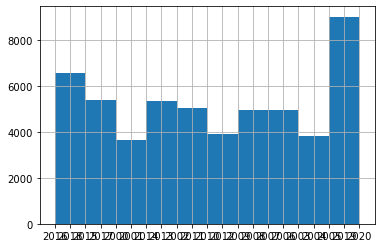

In [41]:
# Check distribution of "year"
print(data["year"].value_counts())
data["year"].hist()

In [34]:
# Extract value of month from variable "data_time_GMT"
data['month']=""
for i in range(52610):
    data['month'][i]=data['date_time_GMT'][i][5:7]

<ipython-input-34-4d4d0fb3aa5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'][i]=data['date_time_GMT'][i][5:7]


<AxesSubplot:>

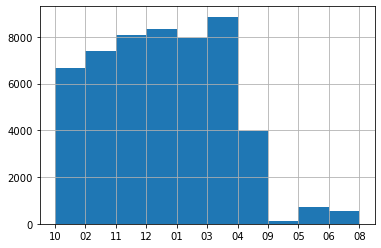

In [35]:
# Check distribution of "year"
data["month"].hist()

In [42]:
data["home_rink_side_start"].value_counts()

right    26852
left     23366
Name: home_rink_side_start, dtype: int64

In [43]:
data["venue"].value_counts()

Madison Square Garden    1764
United Center            1742
Nationwide Arena         1702
Xcel Energy Center       1702
Pepsi Center             1682
                         ... 
TCF Bank Stadium            2
Wrigley Field               2
McMahon Stadium             2
Fenway Park                 2
Coors Field                 2
Name: venue, Length: 116, dtype: int64

In [44]:
data["venue_time_zone_id"].value_counts()

America/New_York       23480
America/Chicago         8788
America/Los_Angeles     5756
America/Denver          3426
America/Vancouver       1740
America/Montreal        1738
America/Detroit         1712
America/Toronto         1702
America/Phoenix         1694
America/Edmonton        1678
America/Winnipeg         896
Name: venue_time_zone_id, dtype: int64

In [45]:
data["venue_time_zone_offset"].value_counts()

-4    23994
-5    12610
-7     8600
-6     5972
-8     1434
Name: venue_time_zone_offset, dtype: int64

In [46]:
data["venue_time_zone_tz"].value_counts()

EDT    23994
CDT     7972
PDT     6062
EST     4638
MDT     4260
MST     2538
CST     1712
PST     1434
Name: venue_time_zone_tz, dtype: int64

<AxesSubplot:>

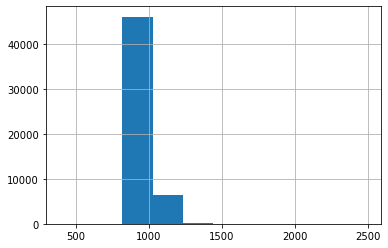

In [48]:
data["timeOnIce"].hist()

<AxesSubplot:>

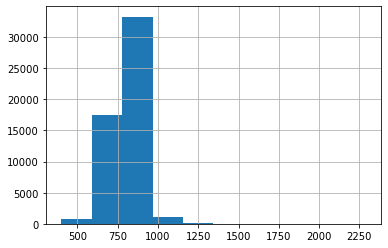

In [49]:
data["evenTimeOnIce"].hist()

<AxesSubplot:>

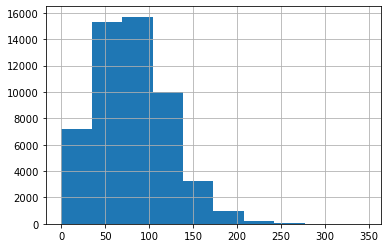

In [50]:
data["shortHandedTimeOnIce"].hist()

<AxesSubplot:>

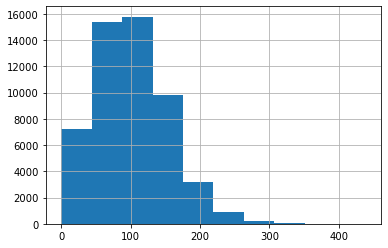

In [51]:
data["powerPlayTimeOnIce"].hist()

In [52]:
data["goalie_replacement"].value_counts()

No     48498
Yes     4077
Name: goalie_replacement, dtype: int64

## 2.7 <b>Check Outliers for Numeric Values</b>

In this section, we use boxplots to observe how many outliers there are for each variable.

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


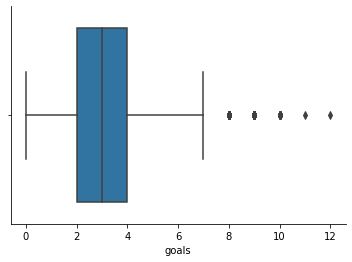

In [53]:
import seaborn as sns 
sns.boxplot(data['goals']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


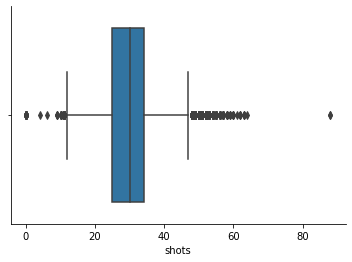

In [54]:
sns.boxplot(data['shots']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


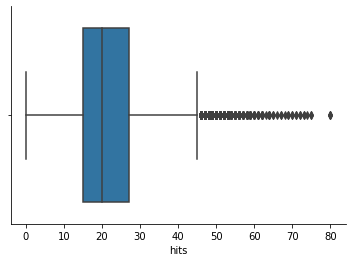

In [55]:
sns.boxplot(data['hits']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


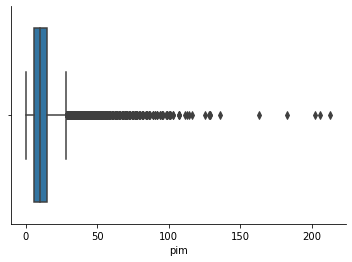

In [56]:
sns.boxplot(data['pim']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


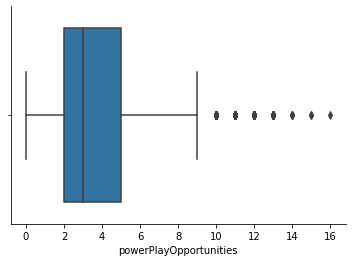

In [57]:
sns.boxplot(data['powerPlayOpportunities']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


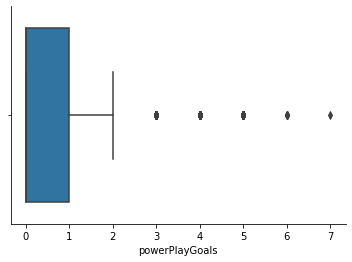

In [58]:
sns.boxplot(data['powerPlayGoals']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


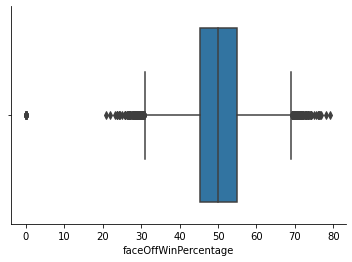

In [59]:
sns.boxplot(data['faceOffWinPercentage']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


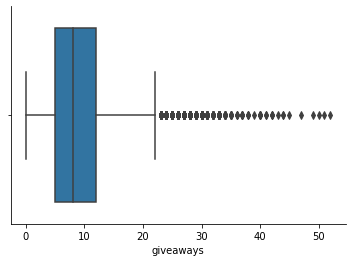

In [60]:
sns.boxplot(data['giveaways']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


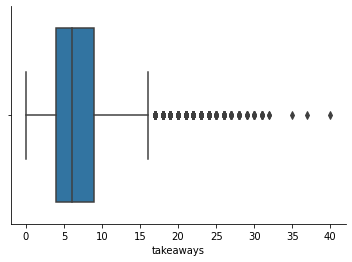

In [61]:
sns.boxplot(data['takeaways']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


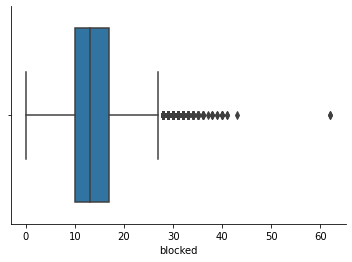

In [62]:
sns.boxplot(data['blocked']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


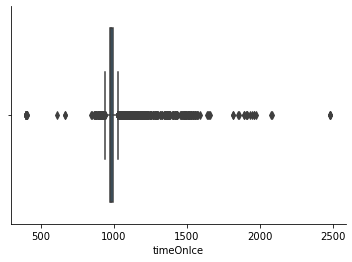

In [63]:
sns.boxplot(data['timeOnIce']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


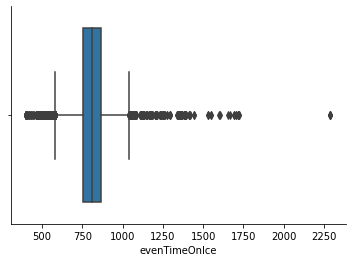

In [64]:
sns.boxplot(data['evenTimeOnIce']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


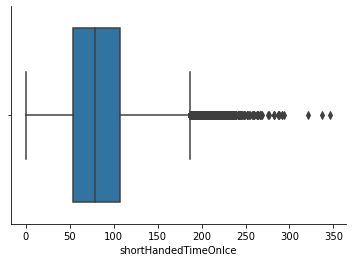

In [65]:
sns.boxplot(data['shortHandedTimeOnIce']) 
sns.despine()

/Users/kex/opt/anaconda3/envs/day_1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


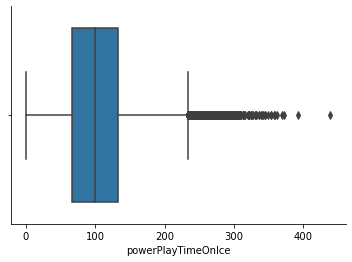

In [66]:
sns.boxplot(data['powerPlayTimeOnIce']) 
sns.despine()

## 2.8 <b>Check Relationships between Variables</b>

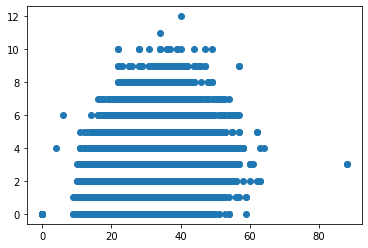

In [71]:
import matplotlib.pyplot as plt
plt.scatter(data['shots'], data['goals'])

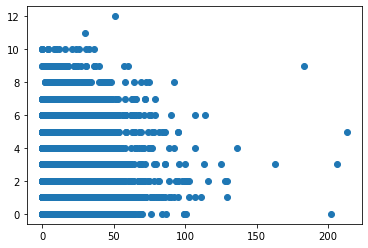

In [72]:
plt.scatter(data['pim'], data['goals'])

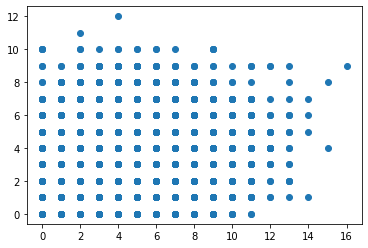

In [73]:
plt.scatter(data['powerPlayOpportunities'], data['goals'])

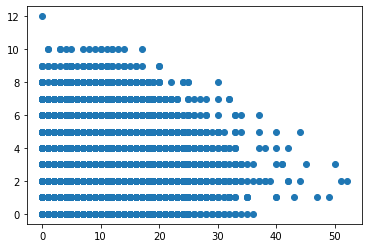

In [75]:
plt.scatter(data['giveaways'], data['goals'])

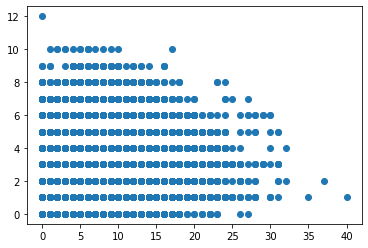

In [82]:
plt.scatter(data['takeaways'], data['goals'])

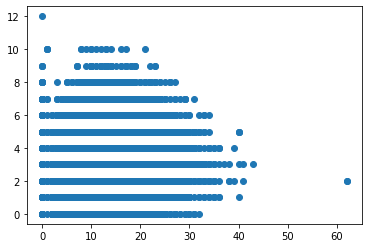

In [83]:
plt.scatter(data['blocked'], data['goals'])

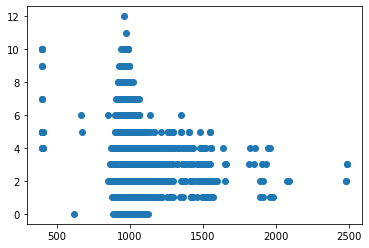

In [78]:
plt.scatter(data['timeOnIce'], data['goals'])

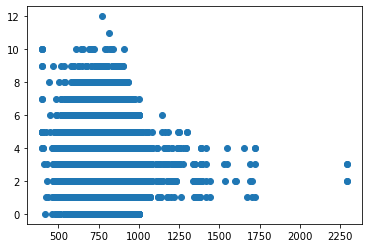

In [79]:
plt.scatter(data['evenTimeOnIce'], data['goals'])

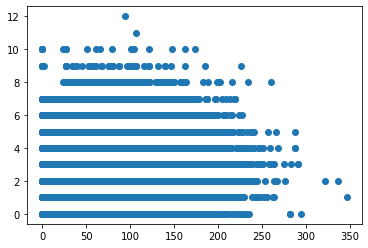

In [80]:
plt.scatter(data['shortHandedTimeOnIce'], data['goals'])

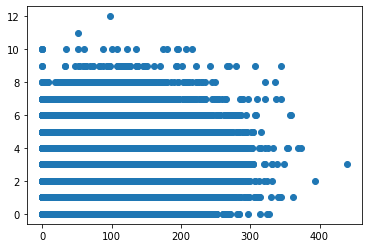

In [81]:
plt.scatter(data['powerPlayTimeOnIce'], data['goals'])

## 2.9 Check Correlations among Variables

<b>Correlation Matrix</b>

In [84]:
data.corr()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,venue_time_zone_offset,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
game_id,1.000000,0.122000,0.035644,0.037271,0.154728,0.342978,-0.282431,-0.344502,-0.092124,-0.001894,0.133770,0.145461,0.278443,-0.200089,0.112090,0.377174,-0.319614,-0.320463
team_id,0.122000,1.000000,-0.001185,-0.007874,-0.019162,0.011246,-0.044171,-0.032043,-0.014289,0.009204,-0.028017,-0.002926,-0.005821,-0.455311,-0.032154,0.016848,-0.035961,-0.027887
won,0.035644,-0.001185,1.000000,0.596658,0.025200,-0.039339,-0.040231,0.014049,0.240823,0.030458,-0.004803,0.104937,0.166406,-0.001869,-0.061166,-0.014459,0.027564,-0.046930
goals,0.037271,-0.007874,0.596658,1.000000,0.150048,-0.064944,0.038303,0.097074,0.459827,0.035202,0.012130,0.095462,0.093338,-0.005184,-0.075527,-0.045709,0.036049,-0.010313
shots,0.154728,-0.019162,0.025200,0.150048,1.000000,0.050009,-0.082409,0.120679,0.083634,0.138162,0.048839,0.099960,-0.074203,0.008603,0.196708,0.098488,-0.164846,0.119446
hits,0.342978,0.011246,-0.039339,-0.064944,0.050009,1.000000,-0.062390,-0.187209,-0.073287,0.003448,0.202028,0.165264,0.291648,-0.014920,0.188226,0.253318,-0.133942,-0.182580
pim,-0.282431,-0.044171,-0.040231,0.038303,-0.082409,-0.062390,1.000000,0.290575,0.125317,-0.008737,-0.067719,-0.068962,-0.063378,0.045888,-0.219771,-0.473263,0.531020,0.233566
powerPlayOpportunities,-0.344502,-0.032043,0.014049,0.097074,0.120679,-0.187209,0.290575,1.000000,0.416477,0.045209,-0.011836,-0.059365,-0.163430,0.047011,-0.102390,-0.699930,0.291043,0.921578
powerPlayGoals,-0.092124,-0.014289,0.240823,0.459827,0.083634,-0.073287,0.125317,0.416477,1.000000,0.024791,-0.001385,0.014879,0.008025,0.010598,-0.062093,-0.211025,0.141753,0.209193
faceOffWinPercentage,-0.001894,0.009204,0.030458,0.035202,0.138162,0.003448,-0.008737,0.045209,0.024791,1.000000,0.068740,0.059343,-0.080402,0.001420,0.006000,-0.000322,-0.031742,0.032160


<b>Correlation Heatmap</b>

<AxesSubplot:>

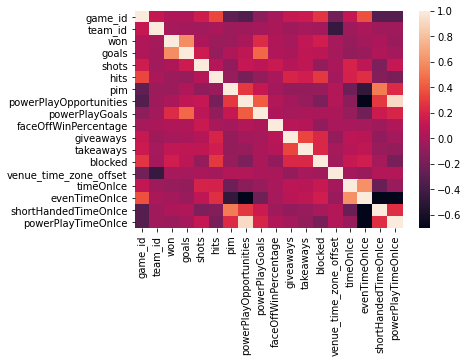

In [87]:
sns.heatmap(data.corr())